LSTM
explained_variance_score:0.966909
mape:11.860586%
mae:16.480750
mse:510.548841
rmse:22.595328
r2:0.963784
GRU
explained_variance_score:0.965854
mape:12.265185%
mae:16.075192
mse:481.527058
rmse:21.943725
r2:0.965842
SAEs
explained_variance_score:0.963585
mape:11.018865%
mae:16.834085
mse:545.690917
rmse:23.360028
r2:0.961291
BiLSTM
explained_variance_score:0.963667
mape:12.183667%
mae:16.632507
mse:536.638924
rmse:23.165468
r2:0.961933


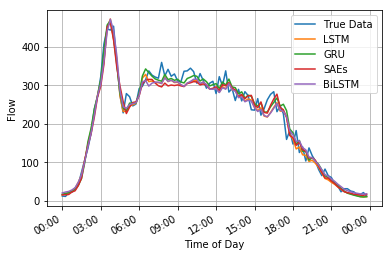

In [6]:
def test():
    lstm = load_model('model/lstm15.h5', custom_objects={'myloss': myloss})
    gru = load_model('model/gru15.h5', custom_objects={'myloss': myloss})
    saes = load_model('model/saes15.h5', custom_objects={'myloss': myloss})
    bi_lstm = load_model('model/bi_lstm_15.h5', custom_objects={'myloss': myloss})
    models = [lstm, gru, saes, bi_lstm]
    names = ['LSTM', 'GRU', 'SAEs', 'BiLSTM']
    lag = 12
    file1 = 'data/train_traffic_flow_15.csv'
    file2 = 'data/test_traffic_flow_15.csv'
    _, _, X_test, y_test, scaler = process_data(file1, file2, lag)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

    y_preds = []
    for name, model in zip(names, models):
        if name == 'SAEs':
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
        else:
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        file = 'images/' + name + '15.png'
        plot_model(model, to_file=file, show_shapes=True)
        predicted = model.predict(X_test)
        predicted = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
        y_preds.append(predicted[:96])
        print(name)
        eva_regress(y_test, predicted)

    plot_results(y_test[: 96], y_preds, names)

test()